In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/BI_project/

/content/drive/MyDrive/BI_project


## 1. Get Korean Export prediction models

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get ML/DL Prediction Models
from models.Kor_export_models import *

## 2. Dataset

In [4]:
data = pd.read_csv("./data/bi_data.csv")
#data = data[['KOR_export', "export_CHI", "export_USA", "export_VET", "export_Hong", "export_JAP"]]
data = data[['KOR_export']]

## 3. Train & Evaluation for Korea Export Short-Term prediction

In [5]:
model_names = ["Linear", "AdaBoost", "ExtraTrees", "RandomForest", "XGB", "LGMB", "SVM", "MLP", "LSTM", "GRU"]
ans = dict()
acc = dict()

for model in model_names:
    ai = AI_Korea_Export(data, model_name = model)
    print("\n ==============<< {} Models Results >>============== \n".format(model))
    if model == "LSTM":
        %time acc[model] = ai.rnn_predict()
    elif model == "GRU":
        %time acc[model] = ai.rnn_predict()
    else:
        %time ans[model], acc[model] = ai.short_term_predict()


 ==============<< Linear Models Results >>============== 

>> Test Acc : 0.7308
>>> Mean Accuracy Score :  0.7308
CPU times: user 33.6 ms, sys: 3.26 ms, total: 36.8 ms
Wall time: 53 ms

 ==============<< AdaBoost Models Results >>============== 

>> Test Acc : 0.7308
>>> Mean Accuracy Score :  0.7308
CPU times: user 236 ms, sys: 4.58 ms, total: 241 ms
Wall time: 232 ms

 ==============<< ExtraTrees Models Results >>============== 

>> Test Acc : 0.7692
>>> Mean Accuracy Score :  0.7692
CPU times: user 177 ms, sys: 2.84 ms, total: 180 ms
Wall time: 175 ms

 ==============<< RandomForest Models Results >>============== 

>> Test Acc : 0.8077
>>> Mean Accuracy Score :  0.8077
CPU times: user 197 ms, sys: 5.27 ms, total: 202 ms
Wall time: 197 ms

 ==============<< XGB Models Results >>============== 

>> Test Acc : 0.7692
>>> Mean Accuracy Score :  0.7692
CPU times: user 205 ms, sys: 7.93 ms, total: 213 ms
Wall time: 86.3 ms

 ==============<< LGMB Models Results >>============== 

>> Tes

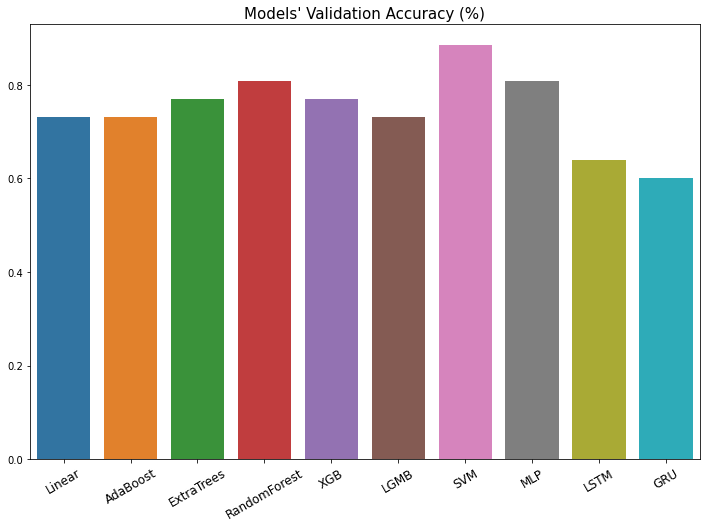

In [6]:
plt.figure(figsize=(12, 8))
sns.barplot(x=list(acc.keys()), y=list(acc.values()))
plt.title("Models' Validation Accuracy (%)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## 4. Train & Evaluation for Korea Export Long-Term prediction



 >> Korea, Long-term Export 'BOOM Signal' 




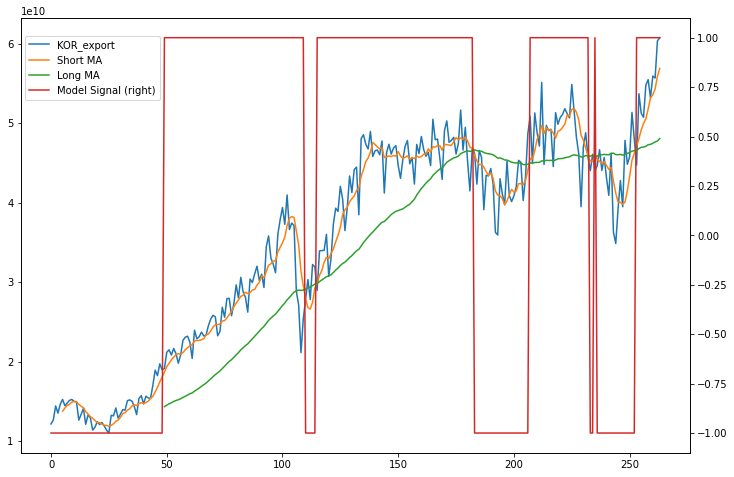

In [13]:
ai = AI_Korea_Export(data)
long_term = ai.long_term_predict()

print("\n\n >> Korea, {} \n\n".format(long_term['KOR_export'][2]))